In [1]:
#Method extracting coordinates from image file names. Images in /shared/data/cleaned_images10M are .tif files with names of type sentinel_image_latitude_longitude.tif

def extract_coordinates(file_name):
    # Remove the "sentinel_image_" prefix and ".tif" extension from the file name
    file_name = file_name.replace("sentinel_image_", "").replace(".tif", "")
    
    # Split the remaining part by underscore to separate latitude and longitude
    lat, lon = file_name.split("_")
    
    # Convert the latitude and longitude strings to float values
    lat = float(lat)
    lon = float(lon)
    list_coordinates = [lat, lon]
    return list_coordinates



In [10]:
"""
NOT USING THIS METHOD OF PROJECTING COORDINATES, ALTHOUGH IT IS RELEVANT

import utm

def meters_to_degrees(image_center, image_width_m, image_length_m):
    utm_center_x, utm_center_y, zone_number, zone_letter = utm.from_latlon(image_center[0], image_center[1])
    northern_hemisphere = image_center[0] >= 0

    if northern_hemisphere:
        half_width_deg = utm.to_latlon(utm_center_x - image_width_m / 2, utm_center_y, zone_number, zone_letter)[1] - image_center[1]
        half_length_deg = utm.to_latlon(utm_center_x, utm_center_y + image_length_m / 2, zone_number, zone_letter)[0] - image_center[0]
    else:
        half_width_deg = image_center[1] - utm.to_latlon(utm_center_x - image_width_m / 2, utm_center_y, zone_number, zone_letter)[1]
        half_length_deg = image_center[0] - utm.to_latlon(utm_center_x, utm_center_y - image_length_m / 2, zone_number, zone_letter)[0]

    return half_width_deg, half_length_deg

"""

In [15]:
# Method to convert meters to degrees to calculate vertices of polygons formed from image coordinates. Formula used: 360 degree longitude/latitude for radius of earth gives 1 degree as 111319.9m

import math

def meters_to_degrees(image_center, image_width_m, image_length_m):
    latitude = image_center[0]

    # Calculate the number of meters in one degree of latitude at the given latitude
    meters_per_degree_lat = 111319.9 
    # Calculate the number of meters in one degree of longitude at the given latitude
    meters_per_degree_lon = 111319.9
    # Convert the image width and length to degrees
    half_width_deg = (image_width_m / meters_per_degree_lon) / 2
    half_length_deg = (image_length_m / meters_per_degree_lat) / 2

    return half_width_deg, half_length_deg

In [ ]:
#Method to calculate degree vertices of polygon given image center, length and width

def calculate_vertices(image_center, half_length_deg, half_width_deg):
    # Calculate the latitude and longitude values for the four vertices
    topleft = (image_center[0] + half_length_deg, image_center[1] - half_width_deg)
    topright = (image_center[0] + half_length_deg, image_center[1] + half_width_deg)
    bottomright = (image_center[0] - half_length_deg, image_center[1] + half_width_deg)
    bottomleft = (image_center[0] - half_length_deg, image_center[1] - half_width_deg)

    # Arrange the vertices in the desired order (clockwise or counterclockwise)
    vertices = [topleft, topright, bottomright, bottomleft]  # Adjust the order if needed

    return vertices

In [12]:
#Method to extract metadata information from image files in shared folder

import tifffile

def extract_metadata_from_tiff(tiff_file):
    # Load the TIFF file
    tiff = tifffile.TiffFile(tiff_file)

    # Extract metadata
    metadata = {}
    if tiff.pages[0].tags:
        for tag in tiff.pages[0].tags.values():
            tag_name = tag.name
            tag_value = tag.value
            metadata[tag_name] = tag_value

    # Close the TIFF file
    tiff.close()

    return metadata

In [15]:
#example extraction 
extract_metadata_from_tiff("/shared/data/cleaned_images10M/part1/sentinel_image_56.20172700864569_-3.7893484760238656.tif")

{'ImageWidth': 224,
 'ImageLength': 224,
 'BitsPerSample': (8, 8, 8),
 'Compression': <COMPRESSION.DEFLATE: 32946>,
 'PhotometricInterpretation': <PHOTOMETRIC.RGB: 2>,
 'SamplesPerPixel': 3,
 'XResolution': (1, 1),
 'YResolution': (1, 1),
 'ResolutionUnit': <RESUNIT.NONE: 1>,
 'TileWidth': 256,
 'TileLength': 256,
 'TileOffsets': (392,),
 'TileByteCounts': (69775,),
 'ModelTransformationTag': (10.011202323025957,
  0.0,
  0.0,
  -422949.5974494229,
  0.0,
  -17.997002152559748,
  0.0,
  7600694.985174147,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0),
 'GeoKeyDirectoryTag': (1,
  1,
  2,
  3,
  1024,
  0,
  1,
  1,
  1025,
  0,
  1,
  1,
  3072,
  0,
  1,
  3857),
 'GDAL_NODATA': '0.0'}

In [16]:
#Script that converts all images in shared image folder to polygons with known vertex coordinates

from shapely import Polygon
import time
import os 
part_list = ['part1','part2','part3','part4','part5','part6','part7','part8']
image_data = {}
image_polygon_list = []
image_filename_list =[]

#Exploring TIF Metadata of images
image_folder = '/shared/data/cleaned_images10M/'
count = 0
for part in part_list:
   for filename in os.listdir(image_folder+part):

        center_coordinates = extract_coordinates(filename)
        
        #width and length is 2240 for all our images
        half_width_deg, half_length_deg = meters_to_degrees(center_coordinates, 224*10, 224*10) 
        rectangle_coordinates = calculate_vertices(center_coordinates, half_length_deg, half_width_deg)
        polygon = Polygon(rectangle_coordinates)
        image_data["/shared/data/cleaned_images10M/"+part+'/'+filename]=polygon
        count+=1
        if (count%50000 == 0): 
                print(count)  
   print(part+"complete")               


50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
part1complete
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000
1350000
1400000
1450000
1500000
1550000
1600000
1650000
1700000
1750000
part2complete
1800000
1850000
1900000
1950000
2000000
2050000
2100000
2150000
2200000
2250000
2300000
2350000
2400000
2450000
2500000
2550000
2600000
part3complete
2650000
2700000
2750000
2800000
2850000
2900000
2950000
3000000
3050000
3100000
3150000
3200000
3250000
3300000
3350000
3400000
3450000
part4complete
3500000
3550000
3600000
3650000
3700000
3750000
3800000
3850000
3900000
3950000
4000000
4050000
4100000
4150000
4200000
4250000
4300000
4350000
4400000
part5complete
4450000
4500000
4550000
4600000
4650000
4700000
4750000
4800000
4850000
4900000
4950000
5000000
5050000
5100000
5150000
5200000
5250000
5300000
5350000
part6complete
5400000
5450000
5500000
5550000
5600000
5650000
5700000
5750000
5800000
5850000


In [17]:
#creating geodataframe
import geopandas as gpd
filenames = list(image_data.keys())
geometries = list(image_data.values())

image_gdf = gpd.GeoDataFrame(geometry=geometries)
image_gdf['filename'] = filenames


In [5]:
# Converting list of polygons into CSV

import csv

# Convert the dictionary into a list of tuples
image_list = [(filename, polygon) for filename, polygon in image_data.items()]

csv_file = 'Image Data Math.csv'

# Write the data to CSV
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'geometry'])  # Write header row
    writer.writerows(image_list)  # Write data rows

In [1]:
#method to convert geojson to merged csv based on spatial intersection of climate features (text labels) and image polygons
import os
import pandas as pd
import geopandas as gpd

def geojson_to_csv(desired_file, name, label, naming_var):
        geojson_folder = '/shared/data/textual/geojsons'
        target_geojson = desired_file
        geojson_file = os.path.join(geojson_folder, target_geojson)
        gdf = gpd.read_file(geojson_file)
        print(gdf.crs)

        # Perform an inner join on the image_gdf and gdf based on spatial intersection
        joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
        joined_df = pd.DataFrame(joined_gdf)
        selected_columns = [name, 'filename', 'geometry']
        subset_df = joined_df[selected_columns]
        subset_df['label'] = label

        # Print the subset DataFrame
        print(subset_df.head(2))

        subset_df.to_csv(naming_var+"Database.csv")

/home/dj200/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [9]:
#Method to use information from saved Image polygon CSV for future use 

import pandas as pd
import geopandas as gpd
from shapely.wkt import loads

# Read the CSV file
df = pd.read_csv("Image Data Math.csv")

# Convert the 'geometry' column from WKT to actual geometries
df['geometry'] = df['geometry'].apply(loads)

# Create the GeoDataFrame
image_gdf = gpd.GeoDataFrame(df, geometry='geometry')
len(image_gdf)

7181486

In [11]:
#Creating Data files for image-text labels

geojson_to_csv("GlobalPowerPlantDatabase.geojson",'name','PowerPlant','PowerPlant')
geojson_to_csv("GlobalAirportDatabase.geojson","Airport Name",'Airport','Airport')
geojson_to_csv("GlobalCoalandMetalMining.geojson","mine_fac",'Mine','Mine')
geojson_to_csv("OffshoreInstallations.geojson",'Name',"OffshoreInstallation","OffshoreInstallation")
geojson_to_csv("USWindTurbineDatabase.geojson","Name",'Wind Turbine','Wind Turbine')
geojson_to_csv("cropHarvest.geojson","Label",'CropHarvest','CropHarvest')
geojson_to_csv("WorldPortIndex.geojson","Main Port Name",'Port','Port')
geojson_to_csv("NaturalEarth_Roads.geojson","Country",'Road','Road1')
geojson_to_csv("GlaciersElevationMass.geojson","Name",'Glacier','Glacier')







EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


                       name  \
63   YAMADA PLAZA CASTANHAL   
390              Yuumil'iik   

                                              filename  \
63   /shared/data/cleaned_images10M/part1/sentinel_...   
390  /shared/data/cleaned_images10M/part1/sentinel_...   

                                              geometry       label  
63   POLYGON ((-1.29239 -47.94765, -1.29239 -47.927...  PowerPlant  
390  POLYGON ((20.98121 -86.86411, 20.98121 -86.843...  PowerPlant  
EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


        Airport Name                                           filename  \
432           TAMUIN  /shared/data/cleaned_images10M/part1/sentinel_...   
5106498       TAMUIN  /shared/data/cleaned_images10M/part6/sentinel_...   

                                                  geometry    label  
432      POLYGON ((22.048 -98.817, 22.048 -98.797, 22.0...  Airport  
5106498  POLYGON ((22.048 -98.817, 22.048 -98.797, 22.0...  Airport  
EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


                    mine_fac  \
69157    Ostrava steel plant   
1571051  Ostrava steel plant   

                                                  filename  \
69157    /shared/data/cleaned_images10M/part1/sentinel_...   
1571051  /shared/data/cleaned_images10M/part2/sentinel_...   

                                                  geometry label  
69157    POLYGON ((18.30926 49.78618, 18.30926 49.80630...  Mine  
1571051  POLYGON ((18.30926 49.78618, 18.30926 49.80630...  Mine  
EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


           Name                                           filename  \
57044   DARIA B  /shared/data/cleaned_images10M/part1/sentinel_...   
984297  DARIA B  /shared/data/cleaned_images10M/part2/sentinel_...   

                                                 geometry  \
57044   POLYGON ((13.25700 44.05133, 13.25700 44.07145...   
984297  POLYGON ((13.25700 44.05133, 13.25700 44.07145...   

                       label  
57044   OffshoreInstallation  
984297  OffshoreInstallation  
EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')


Empty DataFrame
Columns: [Name, filename, geometry, label]
Index: []
EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


             Label                                           filename  \
60004    bush bean  /shared/data/cleaned_images10M/part1/sentinel_...   
1576175  bush bean  /shared/data/cleaned_images10M/part2/sentinel_...   

                                                  geometry        label  
60004    POLYGON ((37.17899 -4.28234, 37.17899 -4.26222...  CropHarvest  
1576175  POLYGON ((37.17899 -4.28234, 37.17899 -4.26222...  CropHarvest  
EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


        Main Port Name                                           filename  \
2632         Port Noro  /shared/data/cleaned_images10M/part1/sentinel_...   
2807  Esquimalt Harbor  /shared/data/cleaned_images10M/part1/sentinel_...   

                                               geometry label  
2632  POLYGON ((-8.206 157.179, -8.206 157.199, -8.2...  Port  
2807  POLYGON ((48.439 -123.446, 48.439 -123.426, 48...  Port  
EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


       Country                                           filename  \
3          NaN  /shared/data/cleaned_images10M/part1/sentinel_...   
590369     NaN  /shared/data/cleaned_images10M/part1/sentinel_...   

                                                 geometry label  
3       POLYGON ((40.47050 43.22632, 40.47050 43.24644...  Road  
590369  POLYGON ((40.94343 43.04522, 40.94343 43.06534...  Road  
EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')


                Name                                           filename  \
122079      KELBASHI  /shared/data/cleaned_images10M/part1/sentinel_...   
139863  GROENFJORD W  /shared/data/cleaned_images10M/part1/sentinel_...   

                                                 geometry    label  
122079  POLYGON ((43.06671 43.06534, 43.06671 43.08546...  Glacier  
139863  POLYGON ((14.21482 77.93722, 14.21482 77.95734...  Glacier  


<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


In [14]:
geojson_to_csv("glims_polygons.geojson","Glacier Name",'Glacier','Glacier2')


EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


      Glacier Name                                           filename  \
394     Negribreen  /shared/data/cleaned_images10M/part1/sentinel_...   
12777   Negribreen  /shared/data/cleaned_images10M/part1/sentinel_...   

                                                geometry    label  
394    POLYGON ((17.67767 78.74211, 17.67767 78.76223...  Glacier  
12777  POLYGON ((18.69093 78.82260, 18.69093 78.84272...  Glacier  


In [ ]:
#running into issues here 
geojson_to_csv("GRIP4_Region1.geojson","RoadCountry",'Road','Road4')




EPSG:4326


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-10-ab79f16e2c01>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(image_gdf, gdf, how='inner', op='intersects')
<ipython-input-10-ab79f16e2c01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['label'] = label


      Glacier Name                                           filename  \
394     Negribreen  /shared/data/cleaned_images10M/part1/sentinel_...   
12777   Negribreen  /shared/data/cleaned_images10M/part1/sentinel_...   

                                                geometry    label  
394    POLYGON ((17.67767 78.74211, 17.67767 78.76223...  Glacier  
12777  POLYGON ((18.69093 78.82260, 18.69093 78.84272...  Glacier  


DriverError: Failed to read GeoJSON data

In [ ]:
#issues here also 
geojson_to_csv("GRIP4_region1geojson","RoadCountry",'Road','Road3')


In [ ]:
#running into error 

geojson_to_csv("GRIP4_region7.geojson","RoadCountry",'Road','Road2')


In [31]:
pip install --upgrade scikit-learn numpy

     |████████████████████████████████| 11.1 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 85.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 83.4 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 17 kB/s s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install --upgrade scikit-learn numpy


Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (1.3.0)
Requirement already up-to-date: numpy in ./.local/lib/python3.8/site-packages (1.24.4)
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting 70% for training, and 30% for test + validate
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# Splitting the remaining 30% into 20% for testing and 10% for validation
test_df, validate_df = train_test_split(temp_df, test_size=0.33, random_state=42)

AttributeError: module 'numpy' has no attribute 'typeDict'

In [37]:
pip install matplotlib pillow


Note: you may need to restart the kernel to use updated packages.


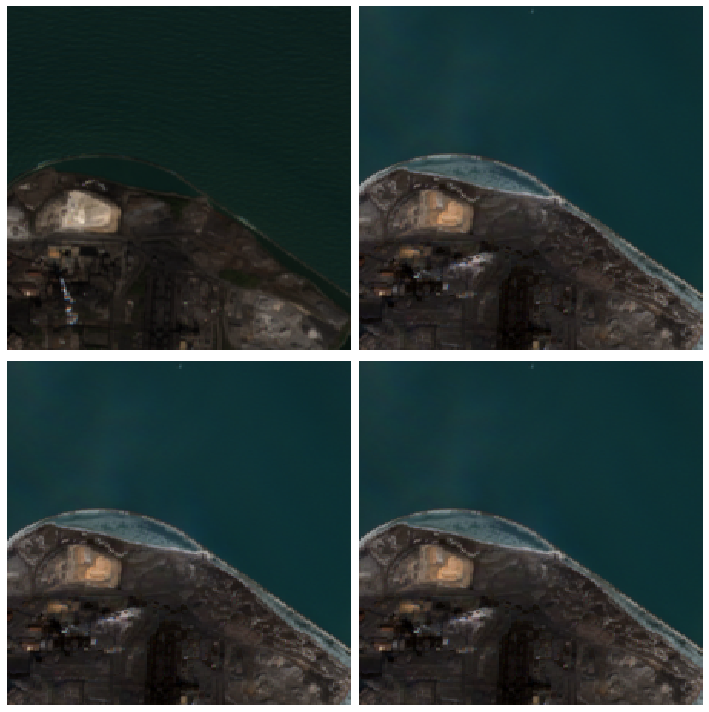

In [1]:
#Some visualizations laying emphasis on information about images. Some images across parts in the shared folder are duplicated. While different parts are supposed to store images of same region across different timelines, some images are indeed duplicated
#some images are also overlapping, meaning that some polygons formed from adjacent images overlap, leading to some features lying in 2 images. 

import matplotlib.pyplot as plt
from PIL import Image

# Replace the file paths with the actual paths of your TIF images
tif_files = [
    "/shared/data/cleaned_images10M/part1/sentinel_image_41.68908491822264_-87.41747086196023.tif",
    "/shared/data/cleaned_images10M/part2/sentinel_image_41.68908491822264_-87.41747086196023.tif",
    "/shared/data/cleaned_images10M/part3/sentinel_image_41.68908491822264_-87.41747086196023.tif",
    "/shared/data/cleaned_images10M/part4/sentinel_image_41.68908491822264_-87.41747086196023.tif"
]

# Create a subplot to display multiple images
num_images = len(tif_files)
num_cols = 2
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the figure and iterate through the images to display
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        tif_image = Image.open(tif_files[i])
        ax.imshow(tif_image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for empty subplots if there are fewer images than subplots

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Replace the file paths with the actual paths of your TIF images
tif_files = [
    "/shared/data/cleaned_images10M/part1/sentinel_image_41.68908491822264_-87.41747086196023.tif",
    "/shared/data/cleaned_images10M/part2/sentinel_image_41.68908491822264_-87.41747086196023.tif",
    "/shared/data/cleaned_images10M/part3/sentinel_image_41.68908491822264_-87.41747086196023.tif",
    "/shared/data/cleaned_images10M/part4/sentinel_image_41.68908491822264_-87.41747086196023.tif"
]

# Create a subplot to display multiple images
num_images = len(tif_files)
num_cols = 2
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the figure and iterate through the images to display
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        tif_image = Image.open(tif_files[i])
        ax.imshow(tif_image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for empty subplots if there are fewer images than subplots

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

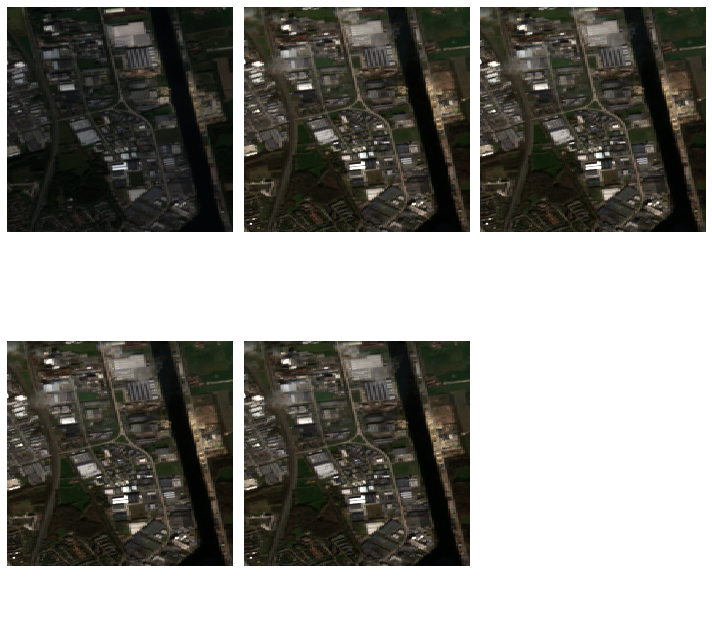

In [41]:
import matplotlib.pyplot as plt
from PIL import Image

# Replace the file paths with the actual paths of your TIF images
tif_files = [
    "/shared/data/cleaned_images10M/part1/sentinel_image_51.2441717295636_3.2131988267446285.tif",
    "/shared/data/cleaned_images10M/part2/sentinel_image_51.2441717295636_3.2131988267446285.tif",
    "/shared/data/cleaned_images10M/part3/sentinel_image_51.2441717295636_3.2131988267446285.tif",
    "/shared/data/cleaned_images10M/part4/sentinel_image_51.2441717295636_3.2131988267446285.tif",
    "/shared/data/cleaned_images10M/part2/sentinel_image_51.2441717295636_3.2131988267446285.tif"
]

# Create a subplot to display multiple images
num_images = len(tif_files)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the figure and iterate through the images to display
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        tif_image = Image.open(tif_files[i])
        ax.imshow(tif_image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for empty subplots if there are fewer images than subplots

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

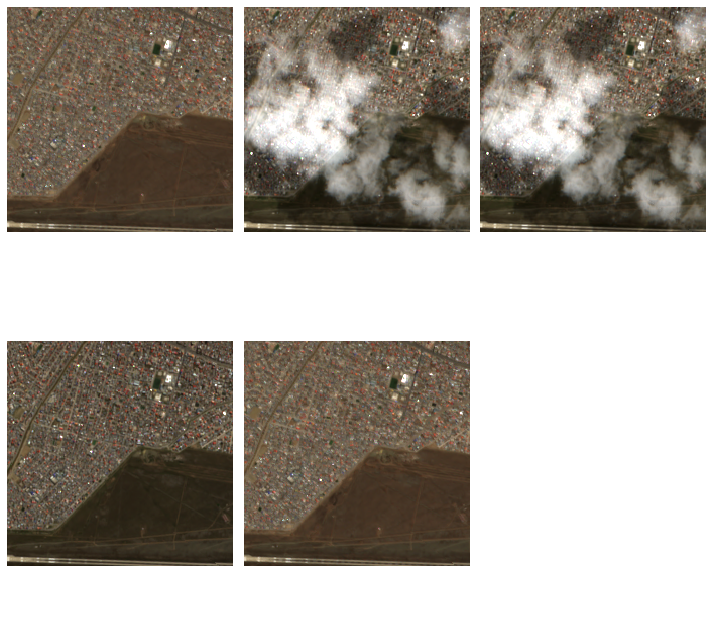

In [43]:
import matplotlib.pyplot as plt
from PIL import Image

# Replace the file paths with the actual paths of your TIF images
tif_files = [
    "/shared/data/cleaned_images10M/part1/sentinel_image_-16.503290840296202_-68.20071030407543.tif",
    "/shared/data/cleaned_images10M/part3/sentinel_image_-16.503290840296202_-68.20071030407543.tif",
    "/shared/data/cleaned_images10M/part4/sentinel_image_-16.503290840296202_-68.20071030407543.tif",
    "/shared/data/cleaned_images10M/part5/sentinel_image_-16.503290840296202_-68.20071030407543.tif",
    "/shared/data/cleaned_images10M/part8/sentinel_image_-16.503290840296202_-68.20071030407543.tif"
]

# Create a subplot to display multiple images
num_images = len(tif_files)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the figure and iterate through the images to display
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        tif_image = Image.open(tif_files[i])
        ax.imshow(tif_image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for empty subplots if there are fewer images than subplots

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

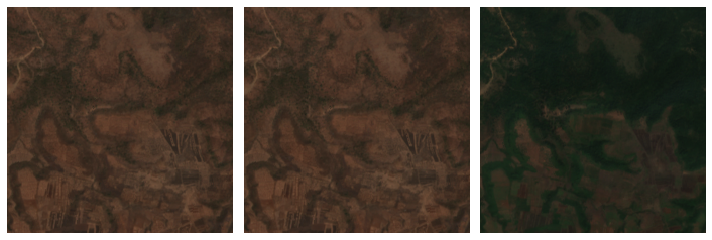

In [46]:
import matplotlib.pyplot as plt
from PIL import Image

# Replace the file paths with the actual paths of your TIF images
tif_files = [
    "/shared/data/cleaned_images10M/part3/sentinel_image_18.490139198891924_78.10825934658466.tif",
    "/shared/data/cleaned_images10M/part4/sentinel_image_18.490139198891924_78.10825934658466.tif",
    "/shared/data/cleaned_images10M/part8/sentinel_image_18.490139198891924_78.10825934658466.tif",
 
]

# Create a subplot to display multiple images
num_images = len(tif_files)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the figure and iterate through the images to display
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        tif_image = Image.open(tif_files[i])
        ax.imshow(tif_image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for empty subplots if there are fewer images than subplots

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

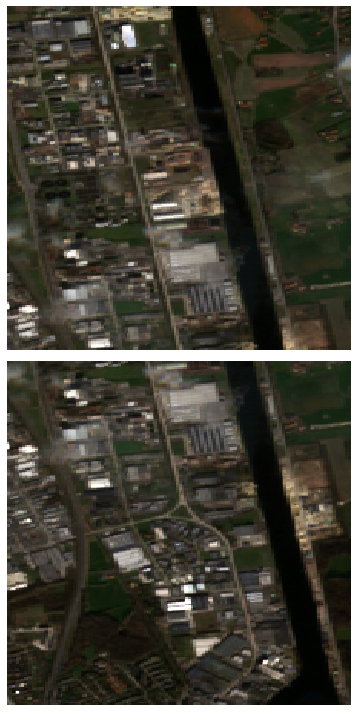

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

# Replace the file paths with the actual paths of your TIF images
tif_files = [
    "/shared/data/cleaned_images10M/part2/sentinel_image_51.25676659728471_3.2131988267446285.tif",
    "/shared/data/cleaned_images10M/part2/sentinel_image_51.2441717295636_3.2131988267446285.tif"
]

# Create a subplot to display multiple images
num_images = len(tif_files)
num_cols = 1
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the figure and iterate through the images to display
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        tif_image = Image.open(tif_files[i])
        ax.imshow(tif_image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for empty subplots if there are fewer images than subplots

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

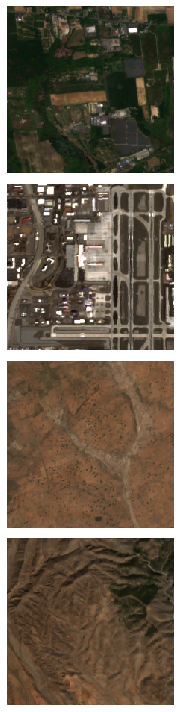

In [4]:

import matplotlib.pyplot as plt
from PIL import Image

# Replace the file paths with the actual paths of your TIF images
tif_files = [
    "/shared/data/cleaned_images10M/part6/sentinel_image_40.91816875451951_-72.74834159840209.tif",
"/shared/data/cleaned_images10M/part2/sentinel_image_39.50451647812399_-119.77406874371808.tif",
"/shared/data/cleaned_images10M/part6/sentinel_image_8.883733122181614_9.692567308041912.tif",
"/shared/data/cleaned_images10M/part1/sentinel_image_37.200987879969695_-2.86372440726711.tif"
]

# Create a subplot to display multiple images
num_images = len(tif_files)
num_cols = 1
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the figure and iterate through the images to display
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        tif_image = Image.open(tif_files[i])
        ax.imshow(tif_image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for empty subplots if there are fewer images than subplots

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

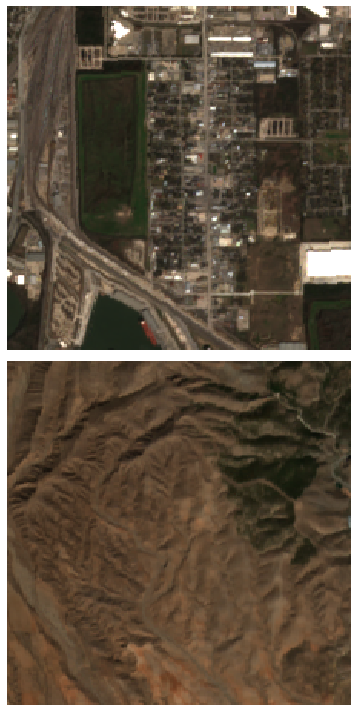

In [9]:

import matplotlib.pyplot as plt
from PIL import Image

# Replace the file paths with the actual paths of your TIF images
tif_files = [
    "/shared/data/cleaned_images10M/part3/sentinel_image_29.75892242465566_-95.28527544639265.tif",
"/shared/data/cleaned_images10M/part1/sentinel_image_37.200987879969695_-2.86372440726711.tif"
]

# Create a subplot to display multiple images
num_images = len(tif_files)
num_cols = 1
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the figure and iterate through the images to display
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        tif_image = Image.open(tif_files[i])
        ax.imshow(tif_image)
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axis for empty subplots if there are fewer images than subplots

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

In [7]:
import pandas as pd
temp = pd.read_csv("image data testing 2.csv")
len(temp)

4715980

In [33]:
df = pd.read_csv("PowerPlantDatabase.csv")
unique_df = df.drop_duplicates(subset='name', keep='first')
ml_df = unique_df.drop(columns=['name','geometry','Unnamed: 0'])
ml_df.reset_index(drop='True')


,filename,label
0,/shared/data/cleaned_images10M/part1/sentinel_...,PowerPlant
1,/shared/data/cleaned_images10M/part1/sentinel_...,PowerPlant
2,/shared/data/cleaned_images10M/part1/sentinel_...,PowerPlant
3,/shared/data/cleaned_images10M/part1/sentinel_...,PowerPlant
4,/shared/data/cleaned_images10M/part1/sentinel_...,PowerPlant
...,...,...
28769,/shared/data/cleaned_images10M/part8/sentinel_...,PowerPlant
28770,/shared/data/cleaned_images10M/part8/sentinel_...,PowerPlant
28771,/shared/data/cleaned_images10M/part8/sentinel_...,PowerPlant
28772,/shared/data/cleaned_images10M/part8/sentinel_...,PowerPlant


In [35]:
import pandas as pd

# Assuming you have already loaded the DataFrame 'df'

# Shuffle the DataFrame to ensure randomization
df = ml_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Splitting 70% for training, 20% for testing, and 10% for validation
train_df = df.iloc[:int(0.7 * len(df))]
test_df = df.iloc[int(0.7 * len(df)):int(0.9 * len(df))]
validate_df = df.iloc[int(0.9 * len(df)):]

# Checking the sizes of the datasets
print(f"Train set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")
print(f"Validation set size: {validate_df.shape}")

train_df.to_csv("powerplant train.csv")
test_df.to_csv("powerplant test.csv")
validate_df.to_csv("powerplant validate.csv")

Train set size: (20141, 2)
Test set size: (5755, 2)
Validation set size: (2878, 2)


In [2]:
import re
def extract_coordinates_temp(file_name):


    pattern = r"[-+]?\d+\.\d+"

    matches = re.findall(pattern, filename)
    latitude = float(matches[0])
    longitude = float(matches[1])
    lat_lon_list = [latitude, longitude]

    return lat_lon_list

In [3]:
import pandas as pd
from shapely import Point
import matplotlib as plt 

airport_df = pd.read_csv("AirportDatabase.csv")

powerplant_df = pd.read_csv("PowerPlantDatabase.csv")

airport_points = []
powerplant_points = []

for filename in airport_df['filename']:
    point = Point(extract_coordinates_temp(filename))
    airport_points.append(point)

for filename in powerplant_df['filename']:
    point = Point(extract_coordinates_temp(filename))
    powerplant_points.append(point)



<ipython-input-4-f54e0079b97d>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


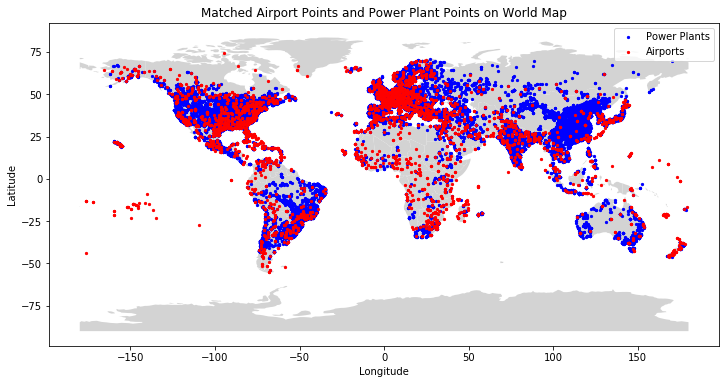

In [4]:
#creating visualization for presentation purposes 

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Step 1: Create GeoDataFrames from the existing lists of Point objects
airport_points_gdf = gpd.GeoDataFrame(geometry=airport_points)
powerplant_points_gdf = gpd.GeoDataFrame(geometry=powerplant_points)

# Step 2: Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Step 3: Plot the world map using a suitable basemap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgray')

powerplant_points_gdf['swapped_geometry'] = powerplant_points_gdf.geometry.apply(lambda geom: Point(geom.y, geom.x))
powerplant_points_gdf_swapped = powerplant_points_gdf.set_geometry('swapped_geometry')
powerplant_points_gdf_swapped.plot(ax=ax, color='blue', markersize=5, label='Power Plants')

# Step 4: Swap the coordinates during plotting for both airport_points and powerplant_points
airport_points_gdf['swapped_geometry'] = airport_points_gdf.geometry.apply(lambda geom: Point(geom.y, geom.x))
airport_points_gdf_swapped = airport_points_gdf.set_geometry('swapped_geometry')
airport_points_gdf_swapped.plot(ax=ax, color='red', markersize=5, label='Airports')



# Step 5: Customize the plot appearance (if needed)
ax.set_title('Matched Airport Points and Power Plant Points on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Step 6: Show the plot
plt.show()

In [14]:
#final code script to create final data called Training data, which includes image and label 

powerplant_df = pd.read_csv("PowerPlantDatabase.csv")
airport_df = pd.read_csv("AirportDatabase.csv")
crop_df = pd.read_csv("CropHarvestDatabase.csv")
road1_df = pd.read_csv("Road1Database.csv")
mine_df = pd.read_csv("MineDatabase.csv")
offshore_df = pd.read_csv("OffshoreInstallationDatabase.csv")
glacier_df = pd.read_csv("GlacierDatabase.csv")
glacier2_df = pd.read_csv("Glacier2Database.csv")
port_df = pd.read_csv("PortDatabase.csv")
turbine_df = pd.read_csv("Wind TurbineDatabase.csv")
df = pd.concat([powerplant_df, airport_df,crop_df,road_df,road1_df,mine_df,offshore_df,glacier_df,glacier2_df,port_df,turbine_df], ignore_index=True)
ml_df = df.drop(columns=['name','Airport Name', 'Label', 'Country', 'mine_fac','Name', 'Glacier Name' , 'Main Port Name','geometry','Unnamed: 0'])
ml_df.tail(10)
ml_df.to_csv("Training Data.csv")